# Titanic dataset analysis 🛳️
### This homework involves cleanning and show high level analysis of the Titanic dataset. The dataset is available in Kaggle. The dataset contains information about the passengers of the Titanic, such as their age, class, fare, etc.

------------------


### 1. Import and clean the dataset

In [122]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter("ignore", category=SyntaxWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=SettingWithCopyWarning)



NameError: name 'SettingWithCopyWarning' is not defined

In [87]:
titanic_df = pd.read_csv("./assets/Datos Titanic/datoslimpios.csv", encoding="latin1", on_bad_lines="warn")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Lastname,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,S


In [88]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Lastname     891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          891 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Lastname', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [90]:
numeric_columns = titanic_df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = titanic_df[numeric_columns]
numeric_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.385152,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.259656,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
df_numeric = titanic_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [92]:
tendencia_central = df_numeric.describe().applymap(lambda x: f"{x:0.3f}")
tendencia_central

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,891.000,891.000,891.000
mean,0.384,2.309,29.385,0.523,0.382,32.204
std,0.487,0.836,13.260,1.103,0.806,49.693
min,0.000,1.000,0.420,0.000,0.000,0.000
25%,0.000,2.000,21.000,0.000,0.000,7.910
50%,0.000,3.000,30.000,0.000,0.000,14.454
75%,1.000,3.000,35.000,1.000,0.000,31.000
max,1.000,3.000,80.000,8.000,6.000,512.329


In [93]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


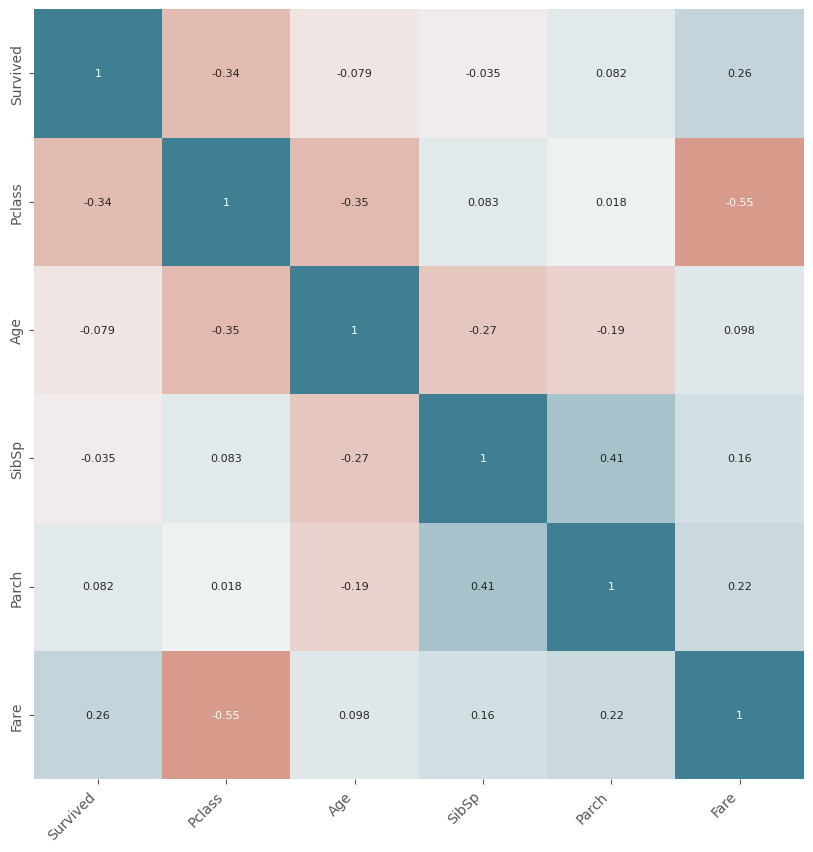

In [ ]:
corr_matrix = df_numeric.corr(method='pearson')
# Print corr matrix as a pretty chart of big size

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.heatmap(corr_matrix,annot=True,cbar=False,annot_kws = {"size":8},vmin=-1,vmax=1,center=0,
cmap=sns.diverging_palette(20, 220, n=200), square=True,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment = 'right',)
ax.tick_params(labelsize = 10)

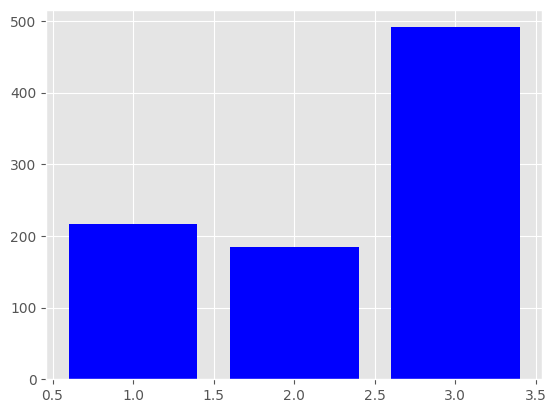

In [ ]:
# Plot frequency distribution of each column in df_numeric
df_numeric.loc[:,'Pclass'] = df_numeric['Pclass'].astype('int')

plt.style.use('ggplot')
plt.
plt.bar(*np.unique(df_numeric['Pclass'], return_counts=True), color='blue', )
plt.show()


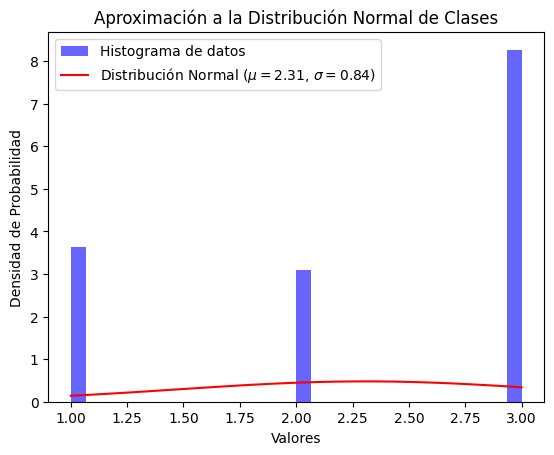

In [97]:
# Estimar parámetros de la distribución normal
mu, sigma = np.mean(df_numeric['Pclass']), np.std(df_numeric['Pclass'])

# Crear el rango de valores para la curva
x = np.linspace(min(df_numeric['Pclass']), max(df_numeric['Pclass']), 100)

y = stats.norm.pdf(x, mu, sigma)

# Graficar el histograma y la curva de densidad
plt.hist(df_numeric['Pclass'], bins=30, density=True, alpha=0.6, color='b', label='Histograma de datos')
plt.plot(x, y, 'r', label=f'Distribución Normal ($\mu={mu:.2f}$, $\sigma={sigma:.2f}$)')
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.title('Aproximación a la Distribución Normal de Clases')
plt.legend()
plt.show()

In [98]:
lista_valores = df_numeric['Pclass'].to_list()
resultados = {x: lista_valores.count(x) for x in lista_valores}
list(resultados.keys())

[3, 1, 2]

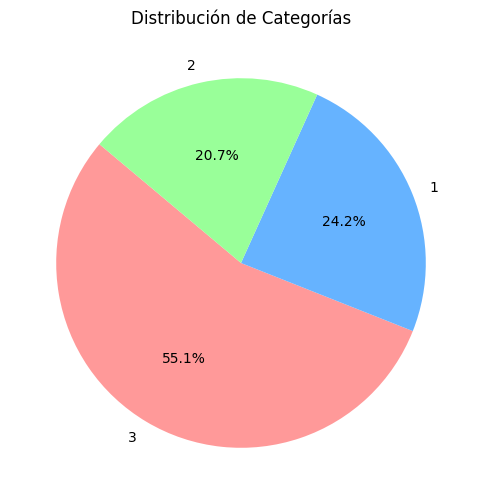

In [99]:
plt.figure(figsize=(8, 6))
plt.pie(list(resultados.values()), labels=list(resultados.keys()), autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title("Distribución de Categorías")
plt.show()

<Axes: ylabel='Frequency'>

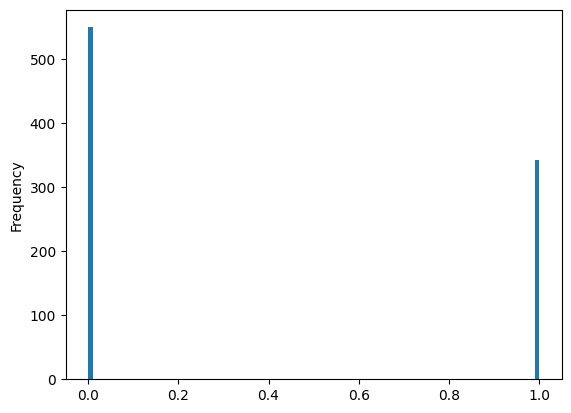

In [100]:
df_numeric['Survived'].plot.hist(bins=100)

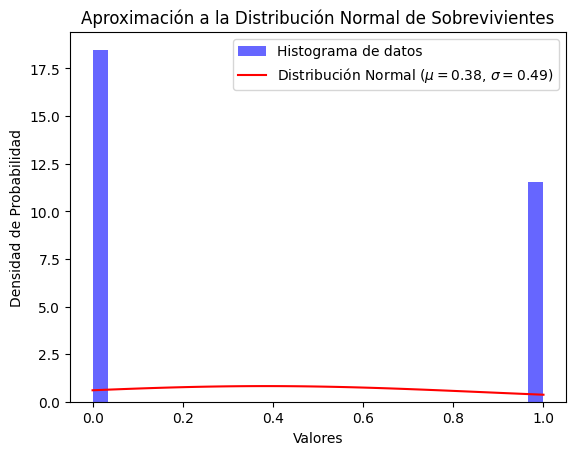

In [101]:
# Estimar parámetros de la distribución normal
mu, sigma = np.mean(df_numeric['Survived']), np.std(df_numeric['Survived'])

# Crear el rango de valores para la curva
x = np.linspace(min(df_numeric['Survived']), max(df_numeric['Survived']), 100)

y = stats.norm.pdf(x, mu, sigma)

# Graficar el histograma y la curva de densidad
plt.hist(df_numeric['Survived'], bins=30, density=True, alpha=0.6, color='b', label='Histograma de datos')
plt.plot(x, y, 'r', label=f'Distribución Normal ($\mu={mu:.2f}$, $\sigma={sigma:.2f}$)')
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.title('Aproximación a la Distribución Normal de Sobrevivientes')
plt.legend()
plt.show()

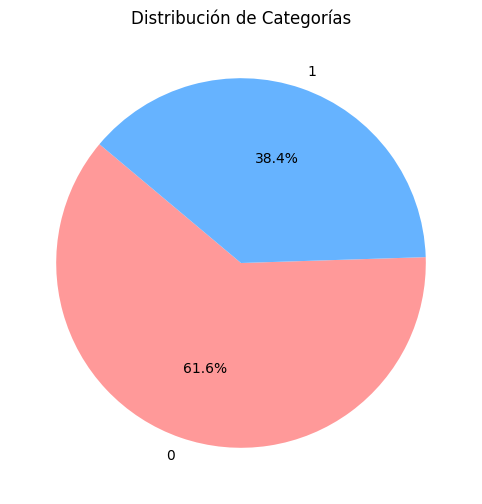

In [102]:
lista_valores = df_numeric['Survived'].to_list()
resultados = {x: lista_valores.count(x) for x in lista_valores}
list(resultados.keys())
plt.figure(figsize=(8, 6))
plt.pie(list(resultados.values()), labels=list(resultados.keys()), autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title("Distribución de Categorías")
plt.show()

In [103]:
import scipy.stats as stats


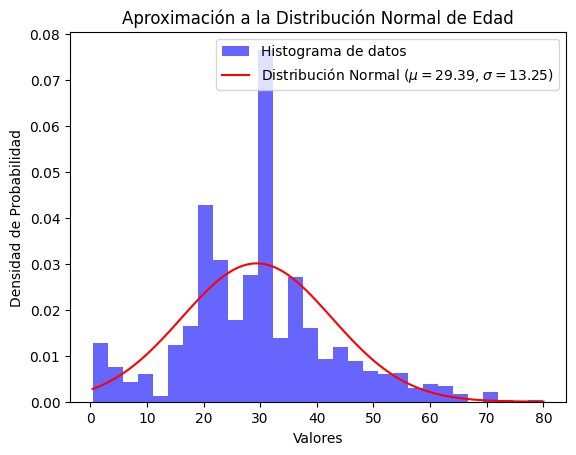

In [104]:
# Estimar parámetros de la distribución normal

mu, sigma = np.mean(df_numeric['Age']), np.std(df_numeric['Age'])

# Crear el rango de valores para la curva
x = np.linspace(min(df_numeric['Age']), max(df_numeric['Age']), 100)

y = stats.norm.pdf(x, mu, sigma)

# Graficar el histograma y la curva de densidad
plt.hist(df_numeric['Age'], bins=30, density=True, alpha=0.6, color='b', label='Histograma de datos')
plt.plot(x, y, 'r', label=f'Distribución Normal ($\mu={mu:.2f}$, $\sigma={sigma:.2f}$)')
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.title('Aproximación a la Distribución Normal de Edad')
plt.legend()
plt.show()

<Axes: ylabel='Frequency'>

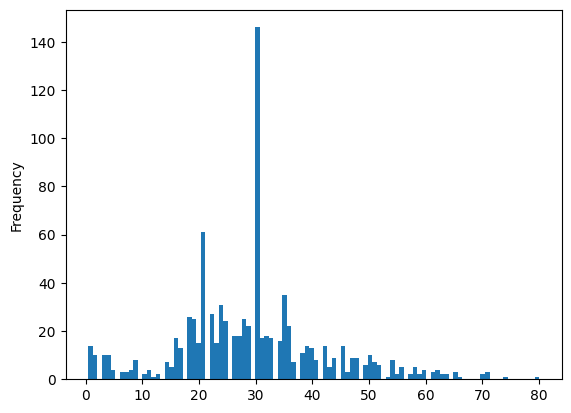

In [105]:
df_numeric['Age'].plot.hist(bins=100)

<Axes: ylabel='Frequency'>

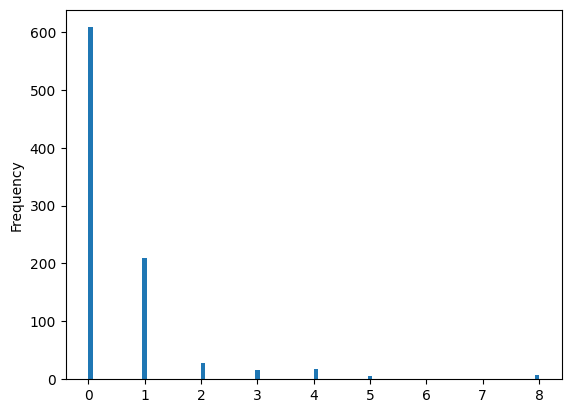

In [106]:
# Plot frequency distribution of each column in df_numeric
df_numeric['SibSp'].plot.hist(bins=100)

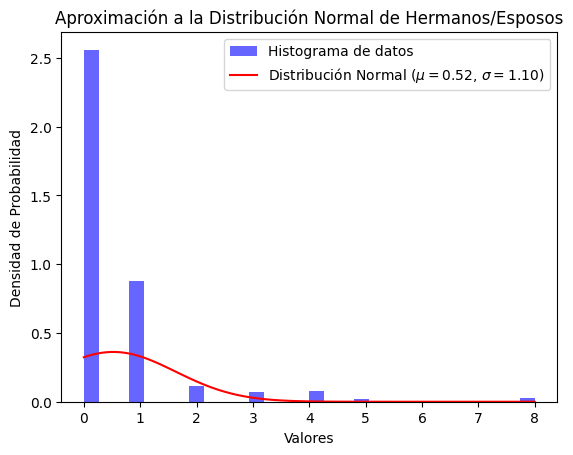

In [107]:
# Estimar parámetros de la distribución normal
mu, sigma = np.mean(df_numeric['SibSp']), np.std(df_numeric['SibSp'])

# Crear el rango de valores para la curva
x = np.linspace(min(df_numeric['SibSp']), max(df_numeric['SibSp']), 100)

y = stats.norm.pdf(x, mu, sigma)

# Graficar el histograma y la curva de densidad
plt.hist(df_numeric['SibSp'], bins=30, density=True, alpha=0.6, color='b', label='Histograma de datos')
plt.plot(x, y, 'r', label=f'Distribución Normal ($\mu={mu:.2f}$, $\sigma={sigma:.2f}$)')
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.title('Aproximación a la Distribución Normal de Hermanos/Esposos')
plt.legend()
plt.show()

<Axes: ylabel='Frequency'>

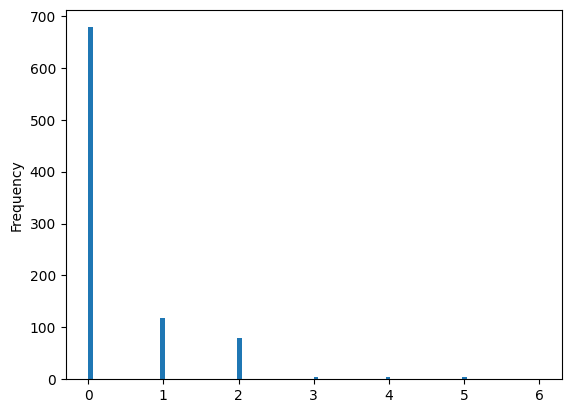

In [108]:
# Plot frequency distribution of each column in df_numeric
df_numeric['Parch'].plot.hist(bins=100)

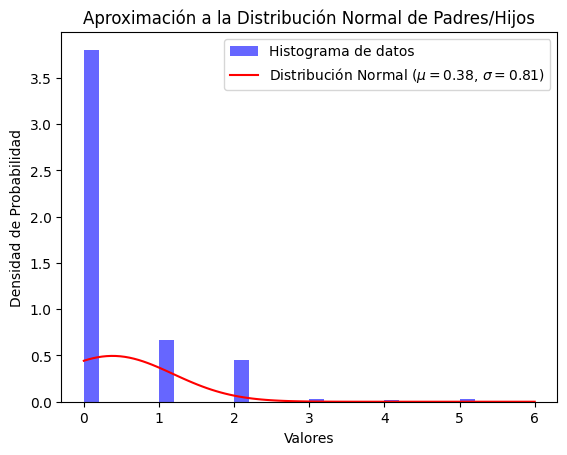

In [109]:
# Estimar parámetros de la distribución normal
mu, sigma = np.mean(df_numeric['Parch']), np.std(df_numeric['Parch'])

# Crear el rango de valores para la curva
x = np.linspace(min(df_numeric['Parch']), max(df_numeric['Parch']), 100)

y = stats.norm.pdf(x, mu, sigma)

# Graficar el histograma y la curva de densidad
plt.hist(df_numeric['Parch'], bins=30, density=True, alpha=0.6, color='b', label='Histograma de datos')
plt.plot(x, y, 'r', label=f'Distribución Normal ($\mu={mu:.2f}$, $\sigma={sigma:.2f}$)')
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.title('Aproximación a la Distribución Normal de Padres/Hijos')
plt.legend()
plt.show()

<Axes: ylabel='Frequency'>

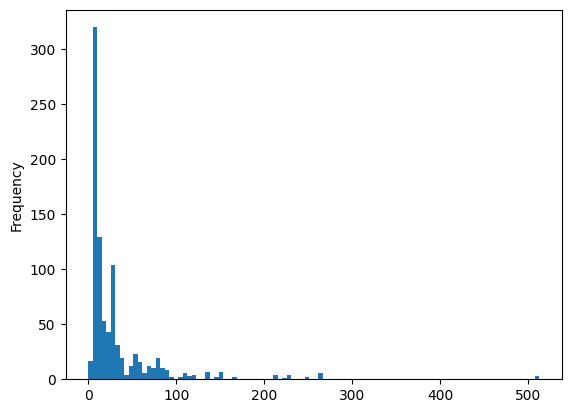

In [110]:
# Plot frequency distribution of each column in df_numeric
df_numeric['Fare'].plot.hist(bins=100)

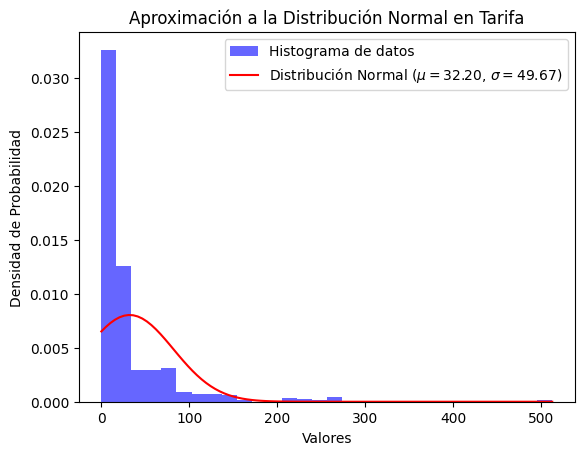

In [111]:
# Estimar parámetros de la distribución normal
mu, sigma = np.mean(df_numeric['Fare']), np.std(df_numeric['Fare'])

# Crear el rango de valores para la curva
x = np.linspace(min(df_numeric['Fare']), max(df_numeric['Fare']), 100)

y = stats.norm.pdf(x, mu, sigma)

# Graficar el histograma y la curva de densidad
plt.hist(df_numeric['Fare'], bins=30, density=True, alpha=0.6, color='b', label='Histograma de datos')
plt.plot(x, y, 'r', label=f'Distribución Normal ($\mu={mu:.2f}$, $\sigma={sigma:.2f}$)')
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.title('Aproximación a la Distribución Normal en Tarifa')
plt.legend()
plt.show()

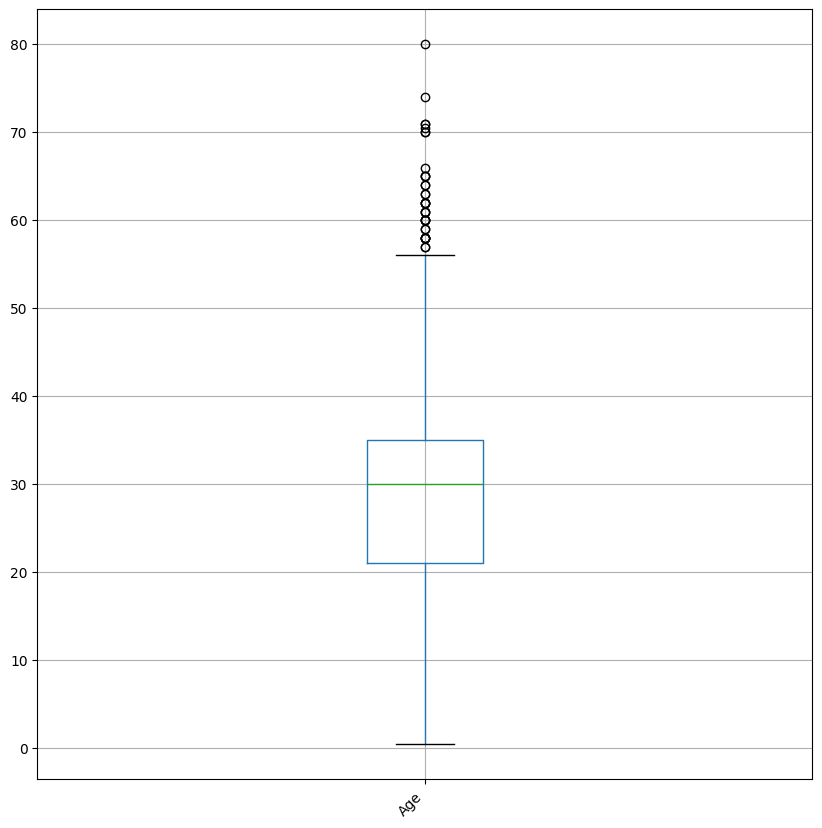

In [112]:
# Boxplot of first 10 numeric columns
boxplot_df = numeric_df[['Age']]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
boxplot_df.boxplot(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment ='right',)
ax.tick_params(labelsize = 10)